# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua\
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: Feb 13,2024 9:37 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Joshua M. Abenojar

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


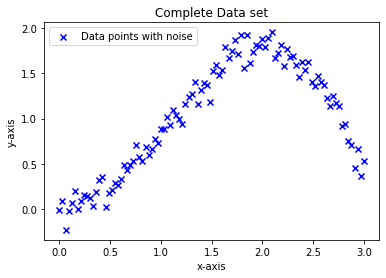

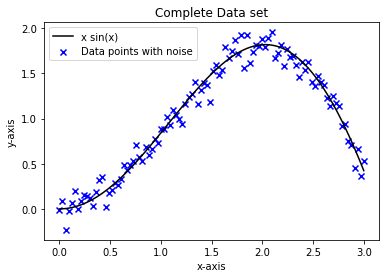

Just by looking at the scatter plot, the data points look like a sinusoid. 
For the generated data set, the maximum absolute error is 0.2902359176534252


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for randomization for the noise and data point splitting
seednumber=1298346
seednumber=241295
seedsplit=42
np.random.seed(seednumber)

datapoints=100
noisevariance=0.1
noise=np.random.normal(0,noisevariance,datapoints) #Create the noise array
x_array=np.linspace(0,3,datapoints) #Create array for the x-values(0<=x<=3)

def func(x):
    #Function that returns f(x) without noise
    return(x*np.sin(x))
y_array=func(x_array) # xsin(x) for the x values 0<=x<=3
y_array_noise=y_array+noise # Add noise to xsin(x)

# Scatter plot of the data set
plt.scatter(x_array,y_array_noise, label="Data points with noise",marker="x",color="blue") # Data points with noise
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.title("Complete Data set")
plt.legend()
plt.show()

# Scatter plot of the data set with the graph of xsin(x)
plt.scatter(x_array,y_array_noise, label="Data points with noise",marker="x",color="blue") # Data points with noise
plt.plot(x_array,y_array, label="x sin(x)",color="black") # Graph of x sin(x)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.title("Complete Data set")
plt.legend()
plt.show()
print(f"Just by looking at the scatter plot, the data points look like a sinusoid. \nFor the generated data set, the maximum absolute error is {max(abs(noise))}")

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


For x data points the number of data points are, 
Train: 50; Test: 25; Cross Validation: 25
For y data points the number of data points are, 
Train: 50; Test: 25; Cross Validation: 25


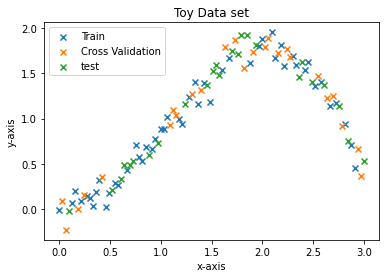

In [64]:
from sklearn.model_selection import train_test_split
x=x_array
y=y_array_noise
# Splits the generated data into Training data and "the rest"
x_extra,x_train,y_extra,y_train=train_test_split(x_array,y_array_noise,random_state=seedsplit,train_size=0.5,test_size=0.5)

#Splits "the rest" into testing and CV data
x_test,x_cv,y_test,y_cv=train_test_split(x_extra,y_extra,random_state=seedsplit,train_size=0.5,test_size=0.5)

# Prints the number of data points in training, testing, and cross validation for x and y(for verification)
print(f"For x data points the number of data points are, \nTrain: {len(x_train)}; Test: {len(x_test)}; Cross Validation: {len(x_cv)}")
print(f"For y data points the number of data points are, \nTrain: {len(y_train)}; Test: {len(y_test)}; Cross Validation: {len(y_cv)}")

# Plots the training, testing, and cross validation data
plt.scatter(x_train,y_train, label="Train",marker="x")
plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
plt.scatter(x_test,y_test, label="test",marker="x")
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.title("Toy Data set")
plt.legend()
plt.show()

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


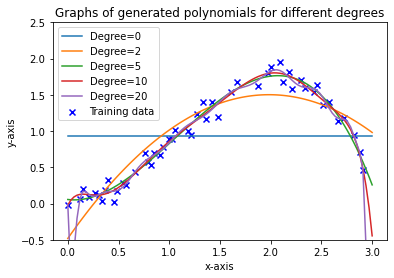

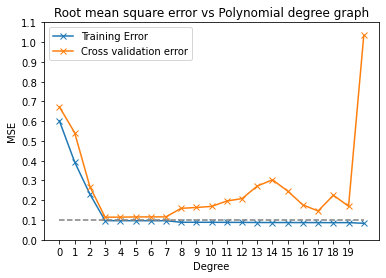

Error template:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Training Error:[0.6013134770172402, 0.3938119457721198, 0.23142246538129282, 0.09670646829976509, 0.09665949617249683, 0.09663599605723466, 0.09651958096047838, 0.09651907957542674, 0.08869526442796864, 0.08865542488025197, 0.08862724137799805, 0.08815607431640712, 0.0881179203215244, 0.08749579207533321, 0.08742662883097704, 0.0872870572918429, 0.0871401549546792, 0.08701887129850042, 0.08679817027955337, 0.08695756235566564, 0.08349221195079438]


In [68]:
## Generate the fit and get the errors
max_degree=20 # Max degree
error_template=np.arange(max_degree+1) #x-axis for degree vs error graph
training_error=[ ] # for training error vs degree graph
cv_error=[ ] # for cross validation error vs degree graph
test_error=[ ] # for testing error vs degree graph
for i in range(max_degree+1):
    degree=i # degree to be used for polyfit
    a=np.polyfit(x_train,y_train,degree) # gives the coefficients of the polynomial
    b=np.poly1d(a) # converts a poly to function that can be substituted using b(x)
    # Root mean square Error computation for the three data points
    training_error.append(np.sqrt((np.sum((y_train-b(x_train))**2))/len(x_train)))
    cv_error.append(np.sqrt((np.sum((y_cv-b(x_cv))**2))/len(x_cv)))
    test_error.append(np.sqrt((np.sum((y_test-b(x_test))**2))/len(x_test)))
    if i in [0,2,5,10,20]:
        plt.plot(x_array,b(x_array),label="Degree="+str(i))
    #plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
    #plt.scatter(x_test,y_test, label="test",marker="x")
plt.scatter(x_train,y_train, label="Training data",marker="x",color="blue")
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.ylim((-0.5,2.5))
plt.title("Graphs of generated polynomials for different degrees")
plt.legend()
plt.show()

# Plots the Training Error and Cross Validation Error for different degrees
plt.plot(error_template,training_error,label="Training Error", marker='x')
plt.plot(error_template,cv_error,label="Cross validation error", marker='x')
plt.plot(error_template,noisevariance*np.ones(max_degree+1),linestyle='dashed',color='gray')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Root mean square error vs Polynomial degree graph')
plt.legend()
plt.xticks(np.arange(0,20,1))
plt.yticks(np.arange(0,1.2,0.1))
plt.show()
print(f"Error template:{error_template}")
print(f"Training Error:{training_error}")

From the Error graph, we can see that the root mean square error of the training set becomes more and more accurate as the degree increases. That makes sense because the goal of the polyfit is to fit the training data, and increasing the degree increases the number of variables to optimize in order to fit that training data. That trend is different from the cross validation error whose error decreases for low degrees, stays close to the expected error for a few degrees, then increases again after passing a certain range of degrees(3-7). When the degree is too high, the generated polynomial becomes too fitted to the training data which does not represent the actual trend of the whole data this becomes overfitted. 

By changing the amount of datapoints generated, I also notice a trend where the range at which both training error and cross validation error are very low. When changing the datapoints=300, the range of degrees before the root mean square error has a noticeable increase becomes 3 to 12

# Extension part

### Effects of different noise standard deviations

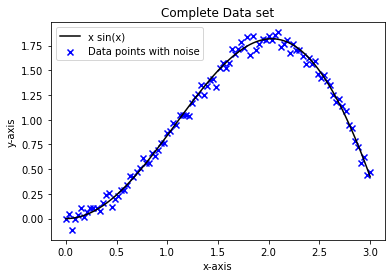

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


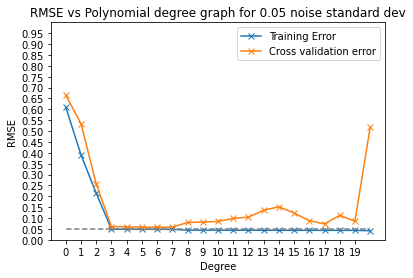

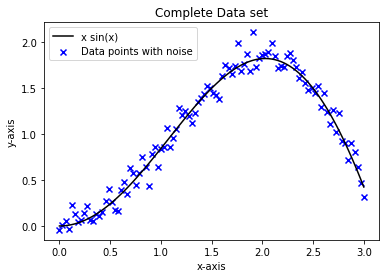

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


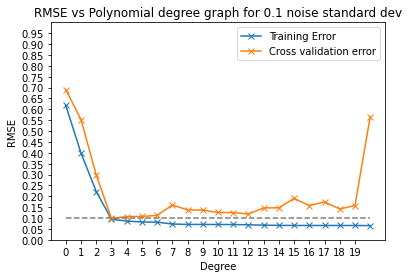

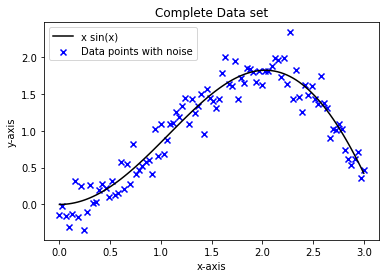

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


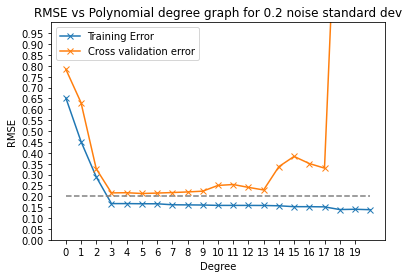

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for randomization for the noise and data point splitting
seednumber=1298346
seednumber=241295
seedsplit=42
np.random.seed(seednumber)

rawr=[0.05,0.1,0.2]
for noisevariance in rawr:
    datapoints=100
    noise=np.random.normal(0,noisevariance,datapoints) #Create the noise array
    x_array=np.linspace(0,3,datapoints) #Create array for the x-values(0<=x<=3)

    def func(x):
        #Function that returns f(x) without noise
        return(x*np.sin(x))
    y_array=func(x_array) # xsin(x) for the x values 0<=x<=3
    y_array_noise=y_array+noise # Add noise to xsin(x)

    # Scatter plot of the data set with the graph of xsin(x)
    plt.scatter(x_array,y_array_noise, label="Data points with noise",marker="x",color="blue") # Data points with noise
    plt.plot(x_array,y_array, label="x sin(x)",color="black") # Graph of x sin(x)
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.title("Complete Data set")
    plt.legend()
    plt.show()
    from sklearn.model_selection import train_test_split
    x=x_array
    y=y_array_noise
    # Splits the generated data into Training data and "the rest"
    x_extra,x_train,y_extra,y_train=train_test_split(x_array,y_array_noise,random_state=seedsplit,train_size=0.5,test_size=0.5)

    #Splits "the rest" into testing and CV data
    x_test,x_cv,y_test,y_cv=train_test_split(x_extra,y_extra,random_state=seedsplit,train_size=0.5,test_size=0.5)

    # Prints the number of data points in training, testing, and cross validation for x and y(for verification)
    """print(f"For x data points the number of data points are, \nTrain: {len(x_train)}; Test: {len(x_test)}; Cross Validation: {len(x_cv)}")
    print(f"For y data points the number of data points are, \nTrain: {len(y_train)}; Test: {len(y_test)}; Cross Validation: {len(y_cv)}")"""

    # Plots the training, testing, and cross validation data
    """plt.scatter(x_train,y_train, label="Train",marker="x")
    plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
    plt.scatter(x_test,y_test, label="test",marker="x")
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.title("Toy Data set")
    plt.legend()
    plt.show()"""

    ## Generate the fit and get the errors
    max_degree=20 # Max degree
    error_template=np.arange(max_degree+1) #x-axis for degree vs error graph
    training_error=[ ] # for training error vs degree graph
    cv_error=[ ] # for cross validation error vs degree graph
    test_error=[ ] # for testing error vs degree graph
    for i in range(max_degree+1):
        degree=i # degree to be used for polyfit
        a=np.polyfit(x_train,y_train,degree) # gives the coefficients of the polynomial
        b=np.poly1d(a) # converts a poly to function that can be substituted using b(x)
        # Root mean square Error computation for the three data points
        training_error.append(np.sqrt((np.sum((y_train-b(x_train))**2))/len(x_train)))
        cv_error.append(np.sqrt((np.sum((y_cv-b(x_cv))**2))/len(x_cv)))
        test_error.append(np.sqrt((np.sum((y_test-b(x_test))**2))/len(x_test)))

    # Plots the Training Error and Cross Validation Error for different degrees
    plt.plot(error_template,training_error,label="Training Error", marker='x')
    plt.plot(error_template,cv_error,label="Cross validation error", marker='x')
    plt.plot(error_template,noisevariance*np.ones(max_degree+1),linestyle='dashed',color='gray')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Polynomial degree graph for '+str(noisevariance)+' noise standard dev')
    plt.legend()
    plt.xticks(np.arange(0,20,1))
    plt.yticks(np.arange(0,1,0.05))
    plt.ylim(0,1)
    plt.show()

For different noise standard deviations, it was observed that the "flat" part of the cross validation error has a lower y-axis values. These y-axis values represents the minimum error achieved by using polyfit and its value was observed to be almost equal to the noise standard deviation.

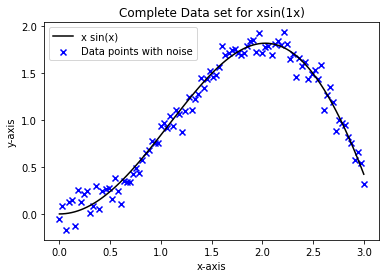

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


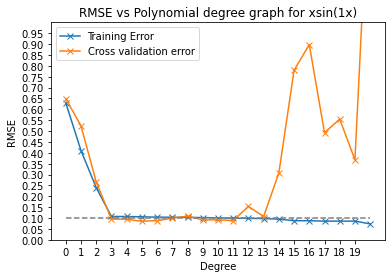

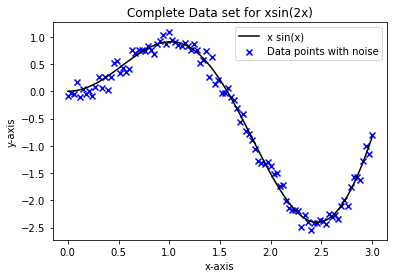

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


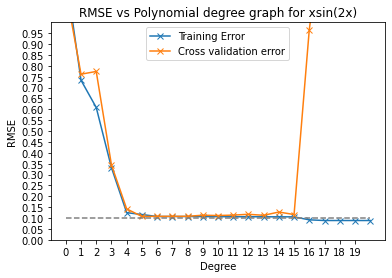

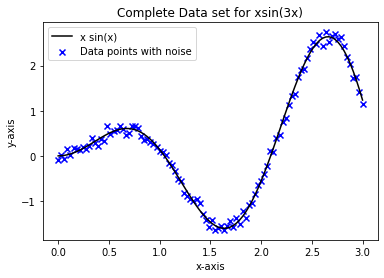

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


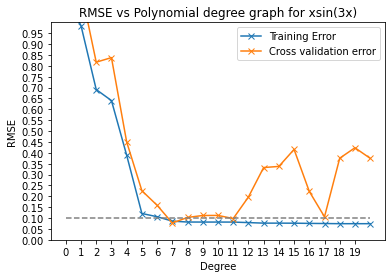

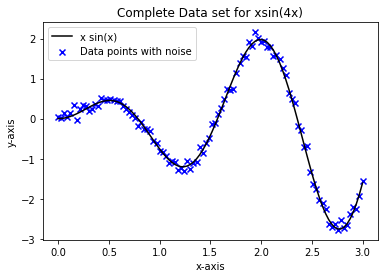

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


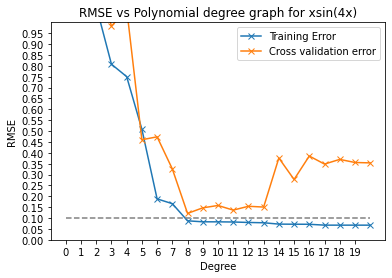

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for randomization for the noise and data point splitting
seednumber=1298346
#seednumber=241295
seedsplit=42
np.random.seed(seednumber)

rawr=[1,2,3,4]
for sinmulti in rawr:
    datapoints=100
    noisevariance=0.1
    noise=np.random.normal(0,noisevariance,datapoints) #Create the noise array
    x_array=np.linspace(0,3,datapoints) #Create array for the x-values(0<=x<=3)

    def func(x):
        #Function that returns f(x) without noise
        return(x*np.sin(sinmulti*x))
    y_array=func(x_array) # xsin(x) for the x values 0<=x<=3
    y_array_noise=y_array+noise # Add noise to xsin(x)

    # Scatter plot of the data set with the graph of xsin(x)
    plt.scatter(x_array,y_array_noise, label="Data points with noise",marker="x",color="blue") # Data points with noise
    plt.plot(x_array,y_array, label="x sin(x)",color="black") # Graph of x sin(x)
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.title("Complete Data set for xsin("+str(sinmulti)+"x)")
    plt.legend()
    plt.show()
    from sklearn.model_selection import train_test_split
    x=x_array
    y=y_array_noise
    # Splits the generated data into Training data and "the rest"
    x_extra,x_train,y_extra,y_train=train_test_split(x_array,y_array_noise,random_state=seedsplit,train_size=0.5,test_size=0.5)

    #Splits "the rest" into testing and CV data
    x_test,x_cv,y_test,y_cv=train_test_split(x_extra,y_extra,random_state=seedsplit,train_size=0.5,test_size=0.5)

    # Prints the number of data points in training, testing, and cross validation for x and y(for verification)
    """print(f"For x data points the number of data points are, \nTrain: {len(x_train)}; Test: {len(x_test)}; Cross Validation: {len(x_cv)}")
    print(f"For y data points the number of data points are, \nTrain: {len(y_train)}; Test: {len(y_test)}; Cross Validation: {len(y_cv)}")"""

    # Plots the training, testing, and cross validation data
    """plt.scatter(x_train,y_train, label="Train",marker="x")
    plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
    plt.scatter(x_test,y_test, label="test",marker="x")
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.title("Toy Data set")
    plt.legend()
    plt.show()"""

    ## Generate the fit and get the errors
    max_degree=20 # Max degree
    error_template=np.arange(max_degree+1) #x-axis for degree vs error graph
    training_error=[ ] # for training error vs degree graph
    cv_error=[ ] # for cross validation error vs degree graph
    test_error=[ ] # for testing error vs degree graph
    for i in range(max_degree+1):
        degree=i # degree to be used for polyfit
        a=np.polyfit(x_train,y_train,degree) # gives the coefficients of the polynomial
        b=np.poly1d(a) # converts a poly to function that can be substituted using b(x)
        # Root mean square Error computation for the three data points
        training_error.append(np.sqrt((np.sum((y_train-b(x_train))**2))/len(x_train)))
        cv_error.append(np.sqrt((np.sum((y_cv-b(x_cv))**2))/len(x_cv)))
        test_error.append(np.sqrt((np.sum((y_test-b(x_test))**2))/len(x_test)))

    # Plots the Training Error and Cross Validation Error for different degrees
    plt.plot(error_template,training_error,label="Training Error", marker='x')
    plt.plot(error_template,cv_error,label="Cross validation error", marker='x')
    plt.plot(error_template,noisevariance*np.ones(max_degree+1),linestyle='dashed',color='gray')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Polynomial degree graph for xsin('+str(sinmulti)+'x)')
    plt.legend()
    plt.xticks(np.arange(0,20,1))
    plt.yticks(np.arange(0,1,0.05))
    plt.ylim(0,1)
    plt.show()

So far, the current established trend is that:
1. Initially, As the degree increases, the RMSE decreases for both training and cross validation error.(underfitted)
2. As the degree increases even further, the cross validation RMSE plateaus(fitted) near the noise standard deviation then increases again.(overfitted)
3. As the degree increases even further, the Training RMSE decreases further and further.

However, when we increase the frequency of the sinusoid multiplied to x, we see an increase of minimum degree that the training data and cross validation data needs for it to plateau near the noise standard deviation. This can be explained because increasing the degree also increases number of relative maxima and minima around $0\le x\le 3$ which better represent sinusoids with higher frequency.